# Data analysis with pandas

> Objectives:
> * Be able to load and save data using pandas
> * Be able to access columns, rows, and elements in DataFrames and Series objects
> * Be able to perform aggregate computations across different variables
> * Be able to filter and subset data

[pandas](http://pandas.pydata.org/) is a Python library that provides tools for processing and manipulating data.

Typically, you will see pandas imported as "`pd`", which is shorter and therefore easier to type than the full name `pandas`:

In [1]:
import pandas as pd

## Loading data

First and foremost, pandas gives us a really convenient way to read in data in CSV ("comma separated value") format. In this lesson, we have two CSV files containing information about precipitation in California. The first file we'll take a look at is `precip_data.csv`, which contains monthly aggregate data:

In [2]:
!head precip_data.csv

region,subregion,station,abbreviation,elevation,month,precip,avg precip,pct of avg,year,date
NORTH COAST,SMITH RIVER,Gasquet Ranger Station,GAS,384,Oct,5.55,7.53,74.0,1987,1987-10-01
NORTH COAST,SMITH RIVER,Gasquet Ranger Station,GAS,384,Nov,8.21,14.14,58.0,1987,1987-11-01
NORTH COAST,SMITH RIVER,Gasquet Ranger Station,GAS,384,Dec,7.53,16.37,46.0,1987,1987-12-01
NORTH COAST,SMITH RIVER,Gasquet Ranger Station,GAS,384,Jan,14.73,16.45,90.0,1987,1987-01-01
NORTH COAST,SMITH RIVER,Gasquet Ranger Station,GAS,384,Feb,8.65,11.95,72.0,1987,1987-02-01
NORTH COAST,SMITH RIVER,Gasquet Ranger Station,GAS,384,Mar,15.05,11.08,136.0,1987,1987-03-01
NORTH COAST,SMITH RIVER,Gasquet Ranger Station,GAS,384,Apr,1.06,6.47,16.0,1987,1987-04-01
NORTH COAST,SMITH RIVER,Gasquet Ranger Station,GAS,384,May,2.81,4.43,63.0,1987,1987-05-01
NORTH COAST,SMITH RIVER,Gasquet Ranger Station,GAS,384,Jun,0.68,0.83,82.0,1987,1987-06-01


To load it, we call `read_csv` function, and pandas automatically figures out how to read the file for us:

In [3]:
monthly = pd.read_csv("precip_data.csv")
monthly

,region,subregion,station,abbreviation,elevation,month,precip,avg precip,pct of avg,year,date
0,NORTH COAST,SMITH RIVER,Gasquet Ranger Station,GAS,384,Oct,5.55,7.53,74,1987,1987-10-01
1,NORTH COAST,SMITH RIVER,Gasquet Ranger Station,GAS,384,Nov,8.21,14.14,58,1987,1987-11-01
2,NORTH COAST,SMITH RIVER,Gasquet Ranger Station,GAS,384,Dec,7.53,16.37,46,1987,1987-12-01
3,NORTH COAST,SMITH RIVER,Gasquet Ranger Station,GAS,384,Jan,14.73,16.45,90,1987,1987-01-01
4,NORTH COAST,SMITH RIVER,Gasquet Ranger Station,GAS,384,Feb,8.65,11.95,72,1987,1987-02-01
5,NORTH COAST,SMITH RIVER,Gasquet Ranger Station,GAS,384,Mar,15.05,11.08,136,1987,1987-03-01
6,NORTH COAST,SMITH RIVER,Gasquet Ranger Station,GAS,384,Apr,1.06,6.47,16,1987,1987-04-01
7,NORTH COAST,SMITH RIVER,Gasquet Ranger Station,GAS,384,May,2.81,4.43,63,1987,1987-05-01
8,NORTH COAST,SMITH RIVER,Gasquet Ranger Station,GAS,384,Jun,0.68,0.83,82,1987,1987-06-01
9,NORTH COAST,SMITH RIVER,Gasquet Ranger Station,GAS,384,Jul,0.28,0.56,50,1987,1987-07-01


The type of object that is returned is called a "data frame", and is one of two fundamental data types that pandas uses:

In [ ]:
pd.read_

In [4]:
type(monthly)

pandas.core.frame.DataFrame

A data frame is essentially a table which has labeled rows and columns. By default when reading in a csv file, pandas will create a numerical index for the rows, and will use the first row of the CSV as the column names. However, having a numerical index isn't necessarily what we want. In this case, it might be more useful for us to have the rows correspond to different stations and the dates the data was recorded. To do this, we can use the `set_index` method of the data frame object:

In [5]:
monthly = monthly.set_index('station')
monthly

,region,subregion,abbreviation,elevation,month,precip,avg precip,pct of avg,year,date
station,,,,,,,,,,
Gasquet Ranger Station,NORTH COAST,SMITH RIVER,GAS,384,Oct,5.55,7.53,74,1987,1987-10-01
Gasquet Ranger Station,NORTH COAST,SMITH RIVER,GAS,384,Nov,8.21,14.14,58,1987,1987-11-01
Gasquet Ranger Station,NORTH COAST,SMITH RIVER,GAS,384,Dec,7.53,16.37,46,1987,1987-12-01
Gasquet Ranger Station,NORTH COAST,SMITH RIVER,GAS,384,Jan,14.73,16.45,90,1987,1987-01-01
Gasquet Ranger Station,NORTH COAST,SMITH RIVER,GAS,384,Feb,8.65,11.95,72,1987,1987-02-01
Gasquet Ranger Station,NORTH COAST,SMITH RIVER,GAS,384,Mar,15.05,11.08,136,1987,1987-03-01
Gasquet Ranger Station,NORTH COAST,SMITH RIVER,GAS,384,Apr,1.06,6.47,16,1987,1987-04-01
Gasquet Ranger Station,NORTH COAST,SMITH RIVER,GAS,384,May,2.81,4.43,63,1987,1987-05-01
Gasquet Ranger Station,NORTH COAST,SMITH RIVER,GAS,384,Jun,0.68,0.83,82,1987,1987-06-01


## Accessing rows, columns, and elements

To access a column in a DataFrame, we index into the DataFrame as if it were a dictionary. For example, to get just the precipitation for each station and date:

In [6]:
monthly['precip']

station
Gasquet Ranger Station     5.55
Gasquet Ranger Station     8.21
Gasquet Ranger Station     7.53
Gasquet Ranger Station    14.73
Gasquet Ranger Station     8.65
Gasquet Ranger Station    15.05
Gasquet Ranger Station     1.06
Gasquet Ranger Station     2.81
Gasquet Ranger Station     0.68
Gasquet Ranger Station     0.28
Gasquet Ranger Station     0.00
Gasquet Ranger Station     0.05
Crescent City 1 N          3.76
Crescent City 1 N          8.54
Crescent City 1 N          5.09
Crescent City 1 N         10.78
Crescent City 1 N          5.64
Crescent City 1 N         12.02
Crescent City 1 N          1.75
Crescent City 1 N          1.22
Crescent City 1 N          0.09
Crescent City 1 N          0.32
Crescent City 1 N          0.00
Crescent City 1 N          0.00
Tule Lake                  0.40
Tule Lake                  1.00
Tule Lake                  0.30
Tule Lake                  1.20
Tule Lake                  0.40
Tule Lake                  0.90
                          ...  


The type of object that is returned is a `Series` object, which is the 1D equivalent of a DataFrame. We can further index into this Series object, for example, to get the precipitation for one particular station:

In [7]:
monthly['precip']['San Jose']

San Jose    0.08
San Jose    0.17
San Jose    0.85
San Jose    1.60
San Jose    2.10
San Jose    1.84
San Jose    0.14
San Jose    0.00
San Jose    0.00
San Jose    0.00
San Jose    0.00
San Jose    0.00
San Jose    0.93
San Jose    1.65
San Jose    3.31
San Jose    2.08
San Jose    0.62
San Jose    0.06
San Jose    1.82
San Jose    0.66
San Jose    0.01
San Jose    0.00
San Jose    0.00
San Jose    0.00
San Jose    0.06
San Jose    1.42
San Jose    2.14
San Jose    1.06
San Jose    1.07
San Jose    1.91
            ... 
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     N

If we want to access the data the other way around -- i.e., access the row(s) first, and then the `'precip'` column -- we need to index slightly differently, using the `.loc` attribute:

In [8]:
monthly.loc['San Jose']

,region,subregion,abbreviation,elevation,month,precip,avg precip,pct of avg,year,date
station,,,,,,,,,,
San Jose,SAN FRANCISCO BAY,SOUTH SF BAY AREA,SNJ,67,Oct,0.08,0.69,12,1987,1987-10-01
San Jose,SAN FRANCISCO BAY,SOUTH SF BAY AREA,SNJ,67,Nov,0.17,1.45,12,1987,1987-11-01
San Jose,SAN FRANCISCO BAY,SOUTH SF BAY AREA,SNJ,67,Dec,0.85,2.46,35,1987,1987-12-01
San Jose,SAN FRANCISCO BAY,SOUTH SF BAY AREA,SNJ,67,Jan,1.60,2.79,57,1987,1987-01-01
San Jose,SAN FRANCISCO BAY,SOUTH SF BAY AREA,SNJ,67,Feb,2.10,2.38,88,1987,1987-02-01
San Jose,SAN FRANCISCO BAY,SOUTH SF BAY AREA,SNJ,67,Mar,1.84,2.03,91,1987,1987-03-01
San Jose,SAN FRANCISCO BAY,SOUTH SF BAY AREA,SNJ,67,Apr,0.14,1.14,12,1987,1987-04-01
San Jose,SAN FRANCISCO BAY,SOUTH SF BAY AREA,SNJ,67,May,0.00,0.36,0,1987,1987-05-01
San Jose,SAN FRANCISCO BAY,SOUTH SF BAY AREA,SNJ,67,Jun,0.00,0.06,0,1987,1987-06-01


This returns another DataFrame, which we can then index as we saw earlier:

In [9]:
monthly.loc['San Jose']['precip']

station
San Jose    0.08
San Jose    0.17
San Jose    0.85
San Jose    1.60
San Jose    2.10
San Jose    1.84
San Jose    0.14
San Jose    0.00
San Jose    0.00
San Jose    0.00
San Jose    0.00
San Jose    0.00
San Jose    0.93
San Jose    1.65
San Jose    3.31
San Jose    2.08
San Jose    0.62
San Jose    0.06
San Jose    1.82
San Jose    0.66
San Jose    0.01
San Jose    0.00
San Jose    0.00
San Jose    0.00
San Jose    0.06
San Jose    1.42
San Jose    2.14
San Jose    1.06
San Jose    1.07
San Jose    1.91
            ... 
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jose     NaN
San Jo

To summarize:

In [ ]:
# column indexing --> Series
monthly['precip']

# column, then row indexing --> Series or element
monthly['precip']['San Jose']

# row indexing --> DataFrame or Series
monthly.loc['San Jose']

# row, then column indexing --> Series or element
monthly.loc['San Jose']['precip']

## Saving data

Let's say we want to save out just the San Jose data. We can do this using the `.to_csv()` method of the DataFrame:

In [10]:
monthly.loc['San Jose'].to_csv('san_jose.csv')

In [11]:
!head san_jose.csv

station,region,subregion,abbreviation,elevation,month,precip,avg precip,pct of avg,year,date
San Jose,SAN FRANCISCO BAY,SOUTH SF BAY AREA,SNJ,67,Oct,0.08,0.69,12.0,1987,1987-10-01
San Jose,SAN FRANCISCO BAY,SOUTH SF BAY AREA,SNJ,67,Nov,0.17,1.45,12.0,1987,1987-11-01
San Jose,SAN FRANCISCO BAY,SOUTH SF BAY AREA,SNJ,67,Dec,0.85,2.46,35.0,1987,1987-12-01
San Jose,SAN FRANCISCO BAY,SOUTH SF BAY AREA,SNJ,67,Jan,1.6,2.79,57.0,1987,1987-01-01
San Jose,SAN FRANCISCO BAY,SOUTH SF BAY AREA,SNJ,67,Feb,2.1,2.38,88.0,1987,1987-02-01
San Jose,SAN FRANCISCO BAY,SOUTH SF BAY AREA,SNJ,67,Mar,1.84,2.03,91.0,1987,1987-03-01
San Jose,SAN FRANCISCO BAY,SOUTH SF BAY AREA,SNJ,67,Apr,0.14,1.14,12.0,1987,1987-04-01
San Jose,SAN FRANCISCO BAY,SOUTH SF BAY AREA,SNJ,67,May,0.0,0.36,0.0,1987,1987-05-01
San Jose,SAN FRANCISCO BAY,SOUTH SF BAY AREA,SNJ,67,Jun,0.0,0.06,0.0,1987,1987-06-01


In [ ]:
monthly.to

## Aggregate computations

One of the really powerful operations that pandas can do involves splitting the data up into particular groups, performing some operation on each group, and then recombining the results.

For example, how would we compute the total precipitation per year for each station? To do this, we want to:

* split the data into groups, where there each group corresponds to one station and year
* sum across the precipitation values for each group
* recombine the resulting sums

In pandas, this is really easy! First, we'll want to "reset" the index of our DataFrame so that everything is in columns:

In [12]:
monthly = monthly.reset_index()
monthly

,station,region,subregion,abbreviation,elevation,month,precip,avg precip,pct of avg,year,date
0,Gasquet Ranger Station,NORTH COAST,SMITH RIVER,GAS,384,Oct,5.55,7.53,74,1987,1987-10-01
1,Gasquet Ranger Station,NORTH COAST,SMITH RIVER,GAS,384,Nov,8.21,14.14,58,1987,1987-11-01
2,Gasquet Ranger Station,NORTH COAST,SMITH RIVER,GAS,384,Dec,7.53,16.37,46,1987,1987-12-01
3,Gasquet Ranger Station,NORTH COAST,SMITH RIVER,GAS,384,Jan,14.73,16.45,90,1987,1987-01-01
4,Gasquet Ranger Station,NORTH COAST,SMITH RIVER,GAS,384,Feb,8.65,11.95,72,1987,1987-02-01
5,Gasquet Ranger Station,NORTH COAST,SMITH RIVER,GAS,384,Mar,15.05,11.08,136,1987,1987-03-01
6,Gasquet Ranger Station,NORTH COAST,SMITH RIVER,GAS,384,Apr,1.06,6.47,16,1987,1987-04-01
7,Gasquet Ranger Station,NORTH COAST,SMITH RIVER,GAS,384,May,2.81,4.43,63,1987,1987-05-01
8,Gasquet Ranger Station,NORTH COAST,SMITH RIVER,GAS,384,Jun,0.68,0.83,82,1987,1987-06-01
9,Gasquet Ranger Station,NORTH COAST,SMITH RIVER,GAS,384,Jul,0.28,0.56,50,1987,1987-07-01


Now, we use the `groupby` command to specify which columns should be used to form the groups:

In [13]:
gb = monthly.groupby(['station', 'year'])
gb

We can index into this "groupby" object just like a DataFrame, and select only the precipitation data:

In [14]:
gb['precip']

Finally, we can calculate summary statistics on these groups. For example, a sum of the precipitation each year for each station:

In [15]:
gb['precip'].sum()

station                year
Adin RS                1987    10.33
                       1988     8.31
                       1989    14.44
                       1990    13.50
                       1991    12.73
                       1992     7.95
                       1993    20.62
                       1994    10.81
                       1995    22.27
                       1996    22.74
                       1997    18.59
                       1998    27.50
                       1999    16.38
                       2000    14.58
                       2001     7.59
                       2002    11.68
                       2003    13.95
                       2004    13.68
                       2005    16.55
                       2006    20.99
                       2007     9.71
                       2008    10.26
                       2009    10.32
                       2010    13.20
                       2011    16.40
                       2012     9.95
          

In [15]:
gb['precip'].sum()

station                year
Adin RS                1987    10.33
                       1988     8.31
                       1989    14.44
                       1990    13.50
                       1991    12.73
                       1992     7.95
                       1993    20.62
                       1994    10.81
                       1995    22.27
                       1996    22.74
                       1997    18.59
                       1998    27.50
                       1999    16.38
                       2000    14.58
                       2001     7.59
                       2002    11.68
                       2003    13.95
                       2004    13.68
                       2005    16.55
                       2006    20.99
                       2007     9.71
                       2008    10.26
                       2009    10.32
                       2010    13.20
                       2011    16.40
                       2012     9.95
          

The result is a Series object that has as its index labels for the stations and years. The values of the Series objects are the total precipitation for the corresponding station and year.

Similar computations follow the same basic recipe. For example, to compute the *average* precipitation per *month*:

In [19]:
data = gb['precip'].mean()

In [22]:
data['San Jose', 1989]

0.76250000000000007

In [16]:
gb['precip'].mean()

station                year
Adin RS                1987    0.860833
                       1988    0.692500
                       1989    1.203333
                       1990    1.125000
                       1991    1.060833
                       1992    0.662500
                       1993    1.718333
                       1994    0.900833
                       1995    1.855833
                       1996    1.895000
                       1997    1.549167
                       1998    2.291667
                       1999    1.365000
                       2000    1.215000
                       2001    0.632500
                       2002    0.973333
                       2003    1.162500
                       2004    1.140000
                       2005    1.504545
                       2006    1.749167
                       2007    0.882727
                       2008    1.026000
                       2009    1.032000
                       2010    1.100000
            

## Filtering Data

We've looked at how to group our data into subsets and how to use get subsets using indexing, but there are also other ways to create subsets of data.
Above we used `.set_index` to move the `'station'` column into the index then grab the data for the `'San Jose'` station. Here's another way to do that using "boolean indexing":

In [17]:
monthly.loc[monthly.station == 'San Jose']

,station,region,subregion,abbreviation,elevation,month,precip,avg precip,pct of avg,year,date
336,San Jose,SAN FRANCISCO BAY,SOUTH SF BAY AREA,SNJ,67,Oct,0.08,0.69,12,1987,1987-10-01
337,San Jose,SAN FRANCISCO BAY,SOUTH SF BAY AREA,SNJ,67,Nov,0.17,1.45,12,1987,1987-11-01
338,San Jose,SAN FRANCISCO BAY,SOUTH SF BAY AREA,SNJ,67,Dec,0.85,2.46,35,1987,1987-12-01
339,San Jose,SAN FRANCISCO BAY,SOUTH SF BAY AREA,SNJ,67,Jan,1.60,2.79,57,1987,1987-01-01
340,San Jose,SAN FRANCISCO BAY,SOUTH SF BAY AREA,SNJ,67,Feb,2.10,2.38,88,1987,1987-02-01
341,San Jose,SAN FRANCISCO BAY,SOUTH SF BAY AREA,SNJ,67,Mar,1.84,2.03,91,1987,1987-03-01
342,San Jose,SAN FRANCISCO BAY,SOUTH SF BAY AREA,SNJ,67,Apr,0.14,1.14,12,1987,1987-04-01
343,San Jose,SAN FRANCISCO BAY,SOUTH SF BAY AREA,SNJ,67,May,0.00,0.36,0,1987,1987-05-01
344,San Jose,SAN FRANCISCO BAY,SOUTH SF BAY AREA,SNJ,67,Jun,0.00,0.06,0,1987,1987-06-01
345,San Jose,SAN FRANCISCO BAY,SOUTH SF BAY AREA,SNJ,67,Jul,0.00,0.04,0,1987,1987-07-01


Another way to filter is with the `.isin` method. This tests whether values are in another set of values.
Say we want all the data for the winter months Dec, Jan, Feb:

In [18]:
monthly.loc[monthly.month.isin(['Dec', 'Jan', 'Feb'])]

,station,region,subregion,abbreviation,elevation,month,precip,avg precip,pct of avg,year,date
2,Gasquet Ranger Station,NORTH COAST,SMITH RIVER,GAS,384,Dec,7.53,16.37,46,1987,1987-12-01
3,Gasquet Ranger Station,NORTH COAST,SMITH RIVER,GAS,384,Jan,14.73,16.45,90,1987,1987-01-01
4,Gasquet Ranger Station,NORTH COAST,SMITH RIVER,GAS,384,Feb,8.65,11.95,72,1987,1987-02-01
14,Crescent City 1 N,NORTH COAST,SMITH RIVER,CCC,40,Dec,5.09,11.31,45,1987,1987-12-01
15,Crescent City 1 N,NORTH COAST,SMITH RIVER,CCC,40,Jan,10.78,11.99,90,1987,1987-01-01
16,Crescent City 1 N,NORTH COAST,SMITH RIVER,CCC,40,Feb,5.64,9.48,59,1987,1987-02-01
26,Tule Lake,NORTH COAST,KLAMATH RIVER,TLL,4035,Dec,0.30,1.46,21,1987,1987-12-01
27,Tule Lake,NORTH COAST,KLAMATH RIVER,TLL,4035,Jan,1.20,1.08,111,1987,1987-01-01
28,Tule Lake,NORTH COAST,KLAMATH RIVER,TLL,4035,Feb,0.40,1.04,38,1987,1987-02-01
38,Callahan,NORTH COAST,KLAMATH RIVER,CAL,3185,Dec,1.26,3.67,34,1987,1987-12-01


And the `.query` method is useful for more complex queries:

In [23]:
monthly.query('region == "SAN FRANCISCO BAY" and month in ["Dec", "Jan", "Feb"]')

,station,region,subregion,abbreviation,elevation,month,precip,avg precip,pct of avg,year,date
278,Angwin Pacific Union Col,SAN FRANCISCO BAY,NORTH SF BAY AREA,APU,1815,Dec,2.54,7.24,35,1987,1987-12-01
279,Angwin Pacific Union Col,SAN FRANCISCO BAY,NORTH SF BAY AREA,APU,1815,Jan,4.38,8.84,50,1987,1987-01-01
280,Angwin Pacific Union Col,SAN FRANCISCO BAY,NORTH SF BAY AREA,APU,1815,Feb,6.31,6.69,94,1987,1987-02-01
290,Lagunitas Lake,SAN FRANCISCO BAY,NORTH SF BAY AREA,LGT,799,Dec,2.84,8.97,32,1987,1987-12-01
291,Lagunitas Lake,SAN FRANCISCO BAY,NORTH SF BAY AREA,LGT,799,Jan,8.26,10.96,75,1987,1987-01-01
292,Lagunitas Lake,SAN FRANCISCO BAY,NORTH SF BAY AREA,LGT,799,Feb,8.78,8.67,101,1987,1987-02-01
302,Fairfield,SAN FRANCISCO BAY,NORTH SF BAY AREA,FRF,40,Dec,NaN,3.77,NaN,1987,1987-12-01
303,Fairfield,SAN FRANCISCO BAY,NORTH SF BAY AREA,FRF,40,Jan,NaN,5.11,NaN,1987,1987-01-01
304,Fairfield,SAN FRANCISCO BAY,NORTH SF BAY AREA,FRF,40,Feb,NaN,3.27,NaN,1987,1987-02-01
314,Napa Fire Department,SAN FRANCISCO BAY,NORTH SF BAY AREA,NSH,35,Dec,1.98,4.59,43,1987,1987-12-01


In [26]:
monthly.rename()

## Plotting

In [27]:
%matplotlib inline

Let's start with plot of the mean California rainfall over the years. The first step will be to use groupby ot aggregate the data by year:

In [28]:
yearly = monthly.groupby('year').precip.mean()
yearly.head()

year
1987    1.435867
1988    1.791026
1989    2.175821
1990    1.668407
1991    1.787778
Name: precip, dtype: float64

That gives us a Series, which has a .plot method for plotting the index of the Series vs. the values:

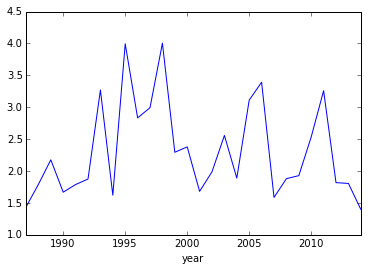

In [29]:
yearly.plot()

Or we can compare regions and make a bar chart:

In [30]:
regional = monthly.groupby('region').precip.mean()
regional

region
CENTRAL COAST        1.870413
COLORADO RIVER       0.299043
NORTH COAST          3.564866
NORTH LAHONTAN       1.722785
SACRAMENTO RIVER     3.365458
SAN FRANCISCO BAY    2.514868
SAN JOAQUIN RIVER    2.268685
SOUTH COAST          1.427060
SOUTH LAHONTAN       0.945169
TULARE LAKE          1.863512
Name: precip, dtype: float64

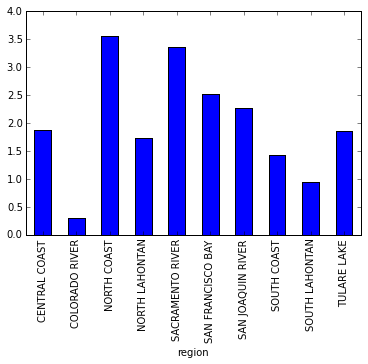

In [31]:
regional.plot(kind='bar')

This is a lot easier to read if it's sorted:

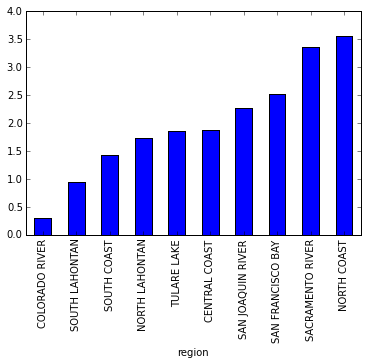

In [32]:
regional.sort(inplace=False).plot(kind='bar')


(Check this map if you're curous where these different regions are: http://www.oocities.org/watergeographer/hydromap.gif.)

If you have a DataFrame of data with the same kind of data in each column you can use the .plot method to create plots with different lines (or other styles) for each column. But first we need to make a DataFrame with data laid out in that way. Let's compare average rainfall in each region over time, which requires grouping on year and region then calculating the mean:

In [33]:
regional_yearly = monthly.groupby(['year', 'region']).precip.mean()
regional_yearly.head(15)

year  region           
1987  CENTRAL COAST        1.090809
      COLORADO RIVER       0.247500
      NORTH COAST          2.681029
      NORTH LAHONTAN       0.891042
      SACRAMENTO RIVER     1.816042
      SAN FRANCISCO BAY    1.335000
      SAN JOAQUIN RIVER    1.229135
      SOUTH COAST          0.819286
      SOUTH LAHONTAN       0.637162
      TULARE LAKE          1.239474
1988  CENTRAL COAST        1.430694
      COLORADO RIVER       0.455417
      NORTH COAST          2.919242
      NORTH LAHONTAN       1.056458
      SACRAMENTO RIVER     2.332746
Name: precip, dtype: float64

regional_yearly is a Series with a two-level index (a MultiIndex), one for year and one for region. What we're after is a DataFrame with regions as columns and precip values for each region/year in the table. The Series .unstack() method can be used to pivot index labels into column labels:

In [34]:
regional_yearly = regional_yearly.unstack(level='region')
regional_yearly.head()

region,CENTRAL COAST,COLORADO RIVER,NORTH COAST,NORTH LAHONTAN,SACRAMENTO RIVER,SAN FRANCISCO BAY,SAN JOAQUIN RIVER,SOUTH COAST,SOUTH LAHONTAN,TULARE LAKE
year,,,,,,,,,,
1987,1.090809,0.247500,2.681029,0.891042,1.816042,1.335000,1.229135,0.819286,0.637162,1.239474
1988,1.430694,0.455417,2.919242,1.056458,2.332746,1.744444,1.492066,1.517584,1.046987,1.483174
1989,1.226241,0.116250,3.560303,2.075486,3.307723,1.884028,1.860304,0.976944,0.851603,1.580833
1990,0.946806,0.226458,2.782821,1.415625,2.405227,1.486310,1.587179,0.892629,0.762308,1.118742
1991,1.624861,0.312708,2.341033,1.318645,2.308409,1.592619,1.726571,1.506389,0.956026,1.647933


Now we can use .plot to get a different line on the plot for every region (column):

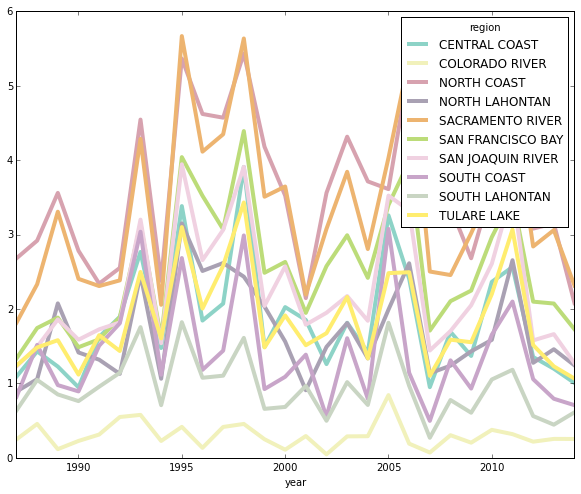

In [35]:
regional_yearly.plot(kind='line', figsize=(10, 8), colormap='Set3', linewidth=4)

In [36]:
from matplotlib.pyplot import style

In [39]:
style.use('ggplot')

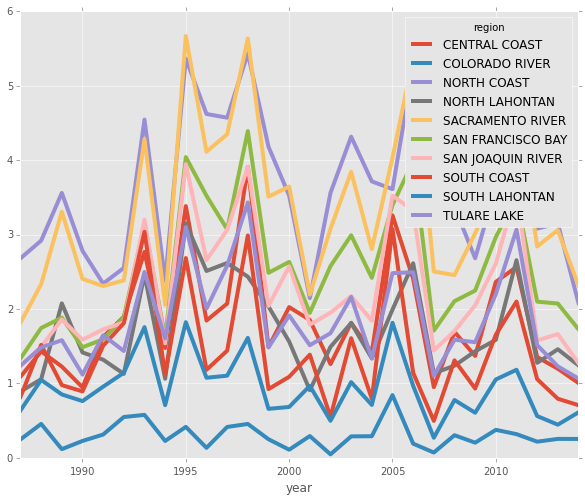

In [40]:
regional_yearly.plot(kind='line', figsize=(10, 8), linewidth=4)